# Landau Theory of First Order Phase Transitions

Import relevant packages

In [1]:
import numpy as np
import numpy.linalg as npla

import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import widgets, interact, interactive

In [2]:
# # Set plot resolution
# mpl.rcParams['figure.dpi']= 300

## Landau Expansion (up to sixth order)


In [3]:
def get_polys(a, b, c, h):
    
    if c != 0.0:
        p_energy = [1/6 * c, 0.0, 1/4 * b, 0.0, 1/2 * a, h, 0.0];
    else:
        p_energy = [1/4 * b, 0.0, 1/2 * a, h, 0.0];
    p_deriv = np.polyder(p_energy);
    
    pn_deriv = p_deriv / p_deriv[0]
    #pn_deriv = p_deriv
    roots = np.roots(pn_deriv)
    
    return p_energy, p_deriv, pn_deriv, roots
    
def landau_plot(p_energy, p_deriv, roots, m_lims=()):
    
    nplt = 100 
    if m_lims:
        mv = np.linspace(m_lims[0], m_lims[1], nplt)
    else:
        mv = np.linspace(
            1.2*np.min(np.real(roots)), 
            1.2*np.max(np.real(roots)), nplt)
    
    energy = np.polyval(p_energy, mv)
    deriv = np.polyval(p_deriv, mv)
    
    plt.figure(100)
    
    plt.plot(mv, energy, linewidth=2);
    #plt.plot(mv, deriv, linewidth=2);
    plt.xlabel('$m$')
    plt.ylabel('$f(m)$')
    plt.show();

def landau_plot_A(a, b, c, h, T):
    
    Tc = 1.0
    
    ap = a * (T-Tc)
    p_energy, p_deriv, pn_deriv, roots = get_polys(ap, b, c, h)
    _, _, _, rb = get_polys(-a*Tc, b, c, h)
    
    m_lims = (1.2*np.min(np.real(rb)), 1.2*np.max(np.real(rb)))
    #m_lims = None
    
    landau_plot(p_energy, p_deriv, roots, m_lims)

In [4]:
a, b, c, h = 1.0, -2.5, 1.0, 0.0

(p_energy, p_deriv, pn_deriv, roots) = get_polys(a, b, c, h)
pord = len(roots)

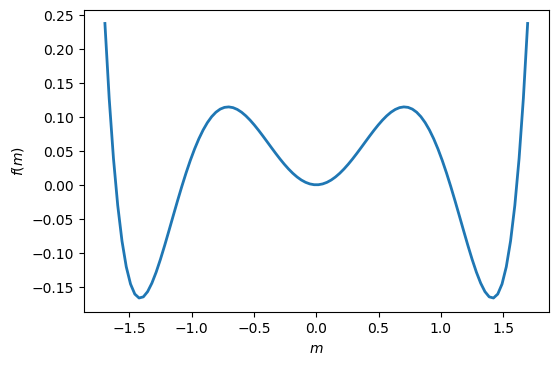

In [5]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 100

landau_plot(p_energy, p_deriv, roots)

In [24]:
%matplotlib widget
#%matplotlib ipympl
mpl.rcParams['figure.dpi']= 100

interactive_plot = interactive(
    landau_plot_A,
    a=(0.0, 2.0, 0.1), b=(-3.0, 0.0, 0.1), c=(0.05, 1.0, 0.1),
    h=(-1.0, 1.0, 0.1), T=(0.0, 3.0, 0.1)
)

output = interactive_plot.children[-1]
# output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0), FloatSlider(value=-1.5, description='b…

## Hysteresis
### Time Dependent Kinetic Response

In [7]:
from td_landau_solver import *

In [8]:
a, b, c, h = 1.0, -2.5, 1.0, -0.5

(p_energy, p_deriv, pn_deriv, roots) = get_polys(a, b, c, h)
pord = len(roots)

# Kinetic
L = 1.0
alpha = p_deriv[0] * L

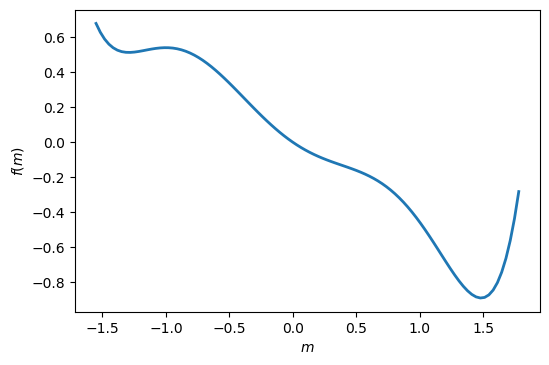

In [9]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 100

landau_plot(p_energy, p_deriv, roots)

In [10]:
# x = newton_raphson_poly(p_deriv, 1.0)
# print(x)

In [11]:
m0 = -0.8

tv = np.linspace(0.0, 6.0, 30);
mv = np.zeros(tv.shape);

tol = 1.0e-10

exps = get_exps_lhs(roots, pord)

m = m0
for i in range(len(tv)):
    m = zero_finder_sv (m, m0, roots, exps, tv[i], alpha, tol=tol)
    mv[i] = m

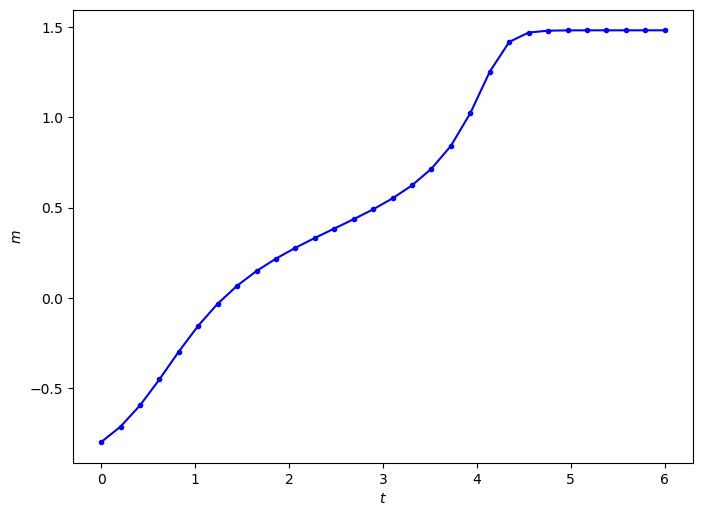

In [12]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 100

plt.figure(figsize=[8,6]);
plt.plot(tv, mv, 'b.-');
plt.ylabel('$m$');
plt.xlabel('$t$');
plt.show();

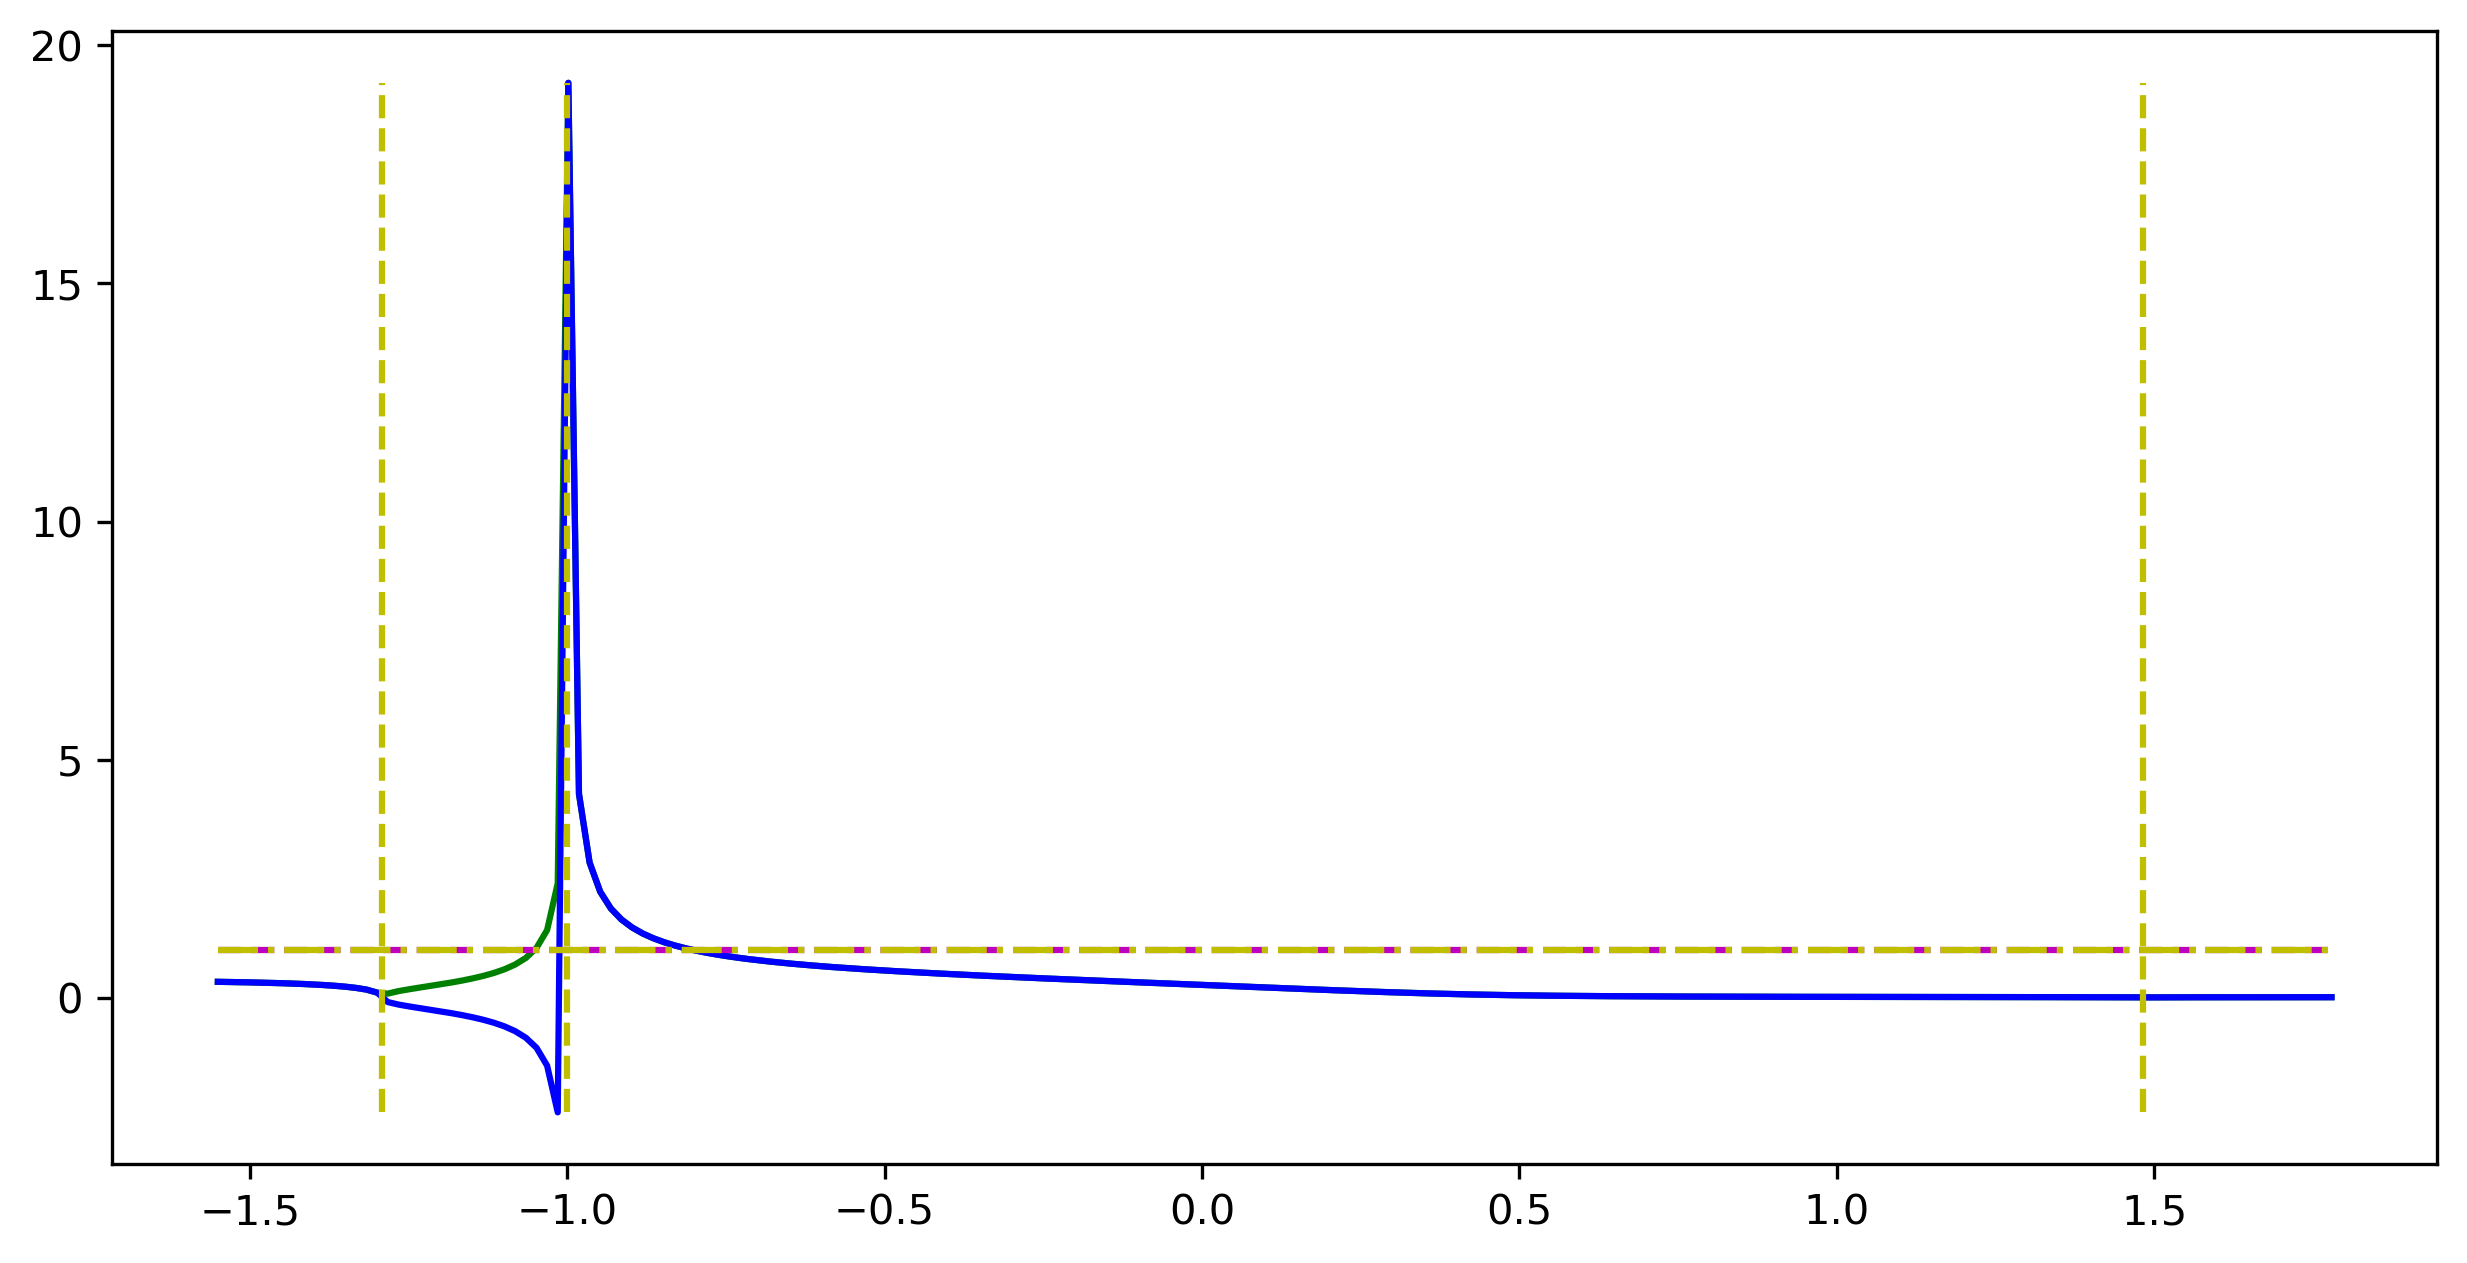

In [13]:
t = 0.0
m = np.linspace(
            1.2*np.min(np.real(roots)), 
            1.2*np.max(np.real(roots)), 200)
y = (sv_lhs (m, m0, roots, exps))

%matplotlib inline
mpl.rcParams['figure.dpi']= 300

plt.figure(figsize=[10,5]);
plt.plot(m, np.abs(y), 'g-')
#plt.plot(m, np.imag(y), 'r-')
plt.plot(m, np.real(y), 'b-')

plt.plot(m, np.exp(-alpha*t) + 0.0*m, 'm--')
#plt.plot(m, -alpha*t + 0.0*m, 'm--')
plt.plot(m, 1.0 + 0.0*m, 'y-.')

for r in roots:
    if np.abs(np.imag(r)) < 1e-12:
        plt.plot(np.real(r) + 0.0*m, 
                 np.linspace(np.min(np.real(y)), np.max(np.real(y)), len(m)), 'y--')

plt.show()

## Renormalization Group Approach

### <center> Ising Model </center>
![IsingUrl](https://mrocklin.github.com/blog/images/ising.gif "Ising")

### *Fractals...*

### <center> Newton-Raphson Root-Finding Fractal </center>
![FractalUrl](https://i.gifer.com/NPp7.gif "Root Finding Fractal")

### <center> Newton-Raphson Method </center>
![FractalUrl](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/NewtonIteration_Ani.gif/300px-NewtonIteration_Ani.gif "NR Method")